# Flight Price Prediction

Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

In [1]:
## Importing Important Libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import*
from sklearn.model_selection import*
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_excel('C:/Users/ASUS/Desktop/PROJECT/csv files/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Data_Train.Xlsx')
train.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [4]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train.dropna(inplace=True)

In [6]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
test=pd.read_excel('C:/Users/ASUS/Desktop/PROJECT/csv files/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Test_set.Xlsx')
test.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [9]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train.dropna(inplace=True)

In [11]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA 
Exploratory Data analysis for Train Dataset

In [12]:
#all the data types and their unique values
for column in train.columns:
    if train[column].dtype == object:
        print(str(column) + ': ' +str())
        print(train[column].value_counts())
        print('\n')

Airline: 
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Date_of_Journey: 
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/

In [13]:
train["Journey_Month"] = pd.to_datetime(train["Date_of_Journey"], format = "%d/%m/%Y").dt.month

train["Journey_Day"] = pd.to_datetime(train["Date_of_Journey"], format="%d/%m/%Y").dt.day

# since there is only 2019 data ,so that i am not taking it

In [14]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [15]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [16]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour

# Extracting Minutes
train["Dep_miniute"] = pd.to_datetime(train["Dep_Time"]).dt.minute

In [17]:
# Now we can drop Dep_Time as it is of no use
train.drop(["Dep_Time"], axis = 1, inplace = True)

In [18]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_hour,Dep_miniute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [19]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train["Arrival_hour"] = pd.to_datetime(train.Arrival_Time).dt.hour

# Extracting Minutes
train["Arrival_minute"] = pd.to_datetime(train.Arrival_Time).dt.minute

In [20]:
# Now we can drop Arrival_Time as it is of no use
train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [21]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_hour,Dep_miniute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [22]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

In [23]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [24]:
# Adding duration_hours and duration_mins list to train_data dataframe

train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

In [25]:
train.drop(["Duration"], axis = 1, inplace = True)

In [26]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_hour,Dep_miniute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [27]:
train['Route_1'] = train["Route"].str.split('→ ').str[0]
train['Route_2'] = train["Route"].str.split('→ ').str[1]
train['Route_3'] = train["Route"].str.split('→ ').str[2]
train['Route_4'] = train["Route"].str.split('→ ').str[3]
train['Route_5'] = train["Route"].str.split('→ ').str[4]

In [28]:
train['Route_1'].fillna("None",inplace = True)
train['Route_2'].fillna("None",inplace = True)
train['Route_3'].fillna("None",inplace = True)
train['Route_4'].fillna("None",inplace = True)
train['Route_5'].fillna("None",inplace = True)

In [29]:
train.drop(["Route"], axis = 1, inplace = True)

In [30]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_hour,Dep_miniute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,3,24,22,20,1,10,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,1,5,50,13,15,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,6,9,9,25,4,25,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,5,12,18,5,23,30,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,3,1,16,50,21,35,4,45,BLR,NAG,DEL,None,None


# Data Handling

In [31]:
leb_code = LabelEncoder()
train['Route_1'] = leb_code.fit_transform(train['Route_1'])
train['Route_2'] = leb_code.fit_transform(train['Route_2'])
train['Route_3'] = leb_code.fit_transform(train['Route_3'])
train['Route_4'] = leb_code.fit_transform(train['Route_4'])
train['Route_5'] = leb_code.fit_transform(train['Route_5'])

In [32]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_hour,Dep_miniute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,3,24,22,20,1,10,2,50,0,13,24,12,4
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,1,5,50,13,15,7,25,2,25,1,3,4
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,6,9,9,25,4,25,19,0,3,32,4,5,4
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,5,12,18,5,23,30,5,25,2,34,3,12,4
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,3,1,16,50,21,35,4,45,0,34,8,12,4


In [33]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train.drop(["Additional_Info"], axis = 1, inplace = True)

In [34]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [35]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_Day,Dep_hour,Dep_miniute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50,0,13,24,12,4
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25,2,25,1,3,4
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0,3,32,4,5,4
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25,2,34,3,12,4
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45,0,34,8,12,4


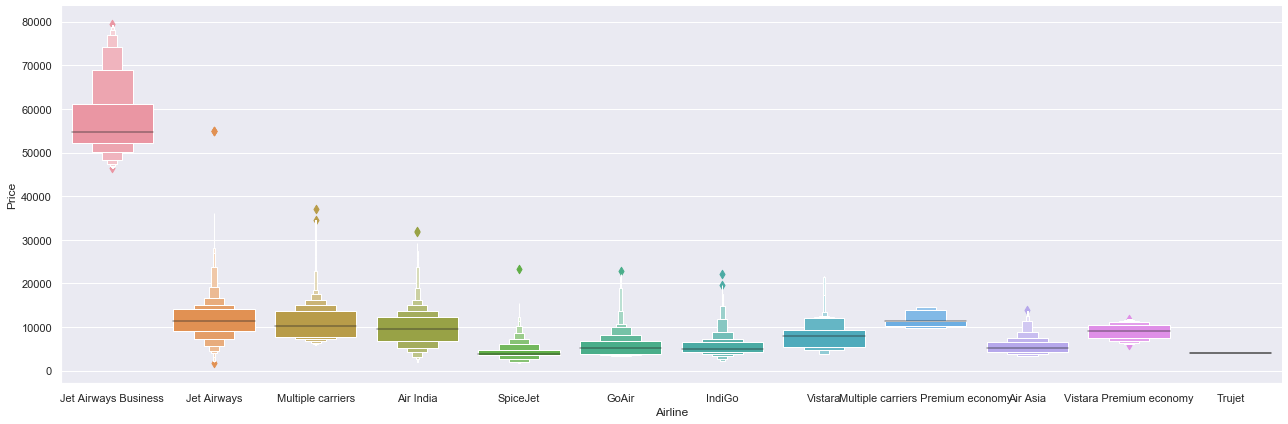

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [36]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()


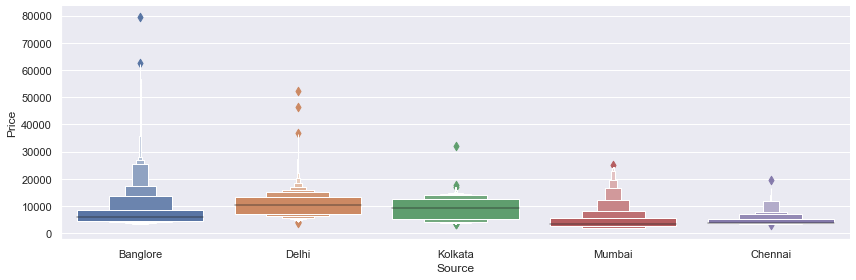

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [37]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

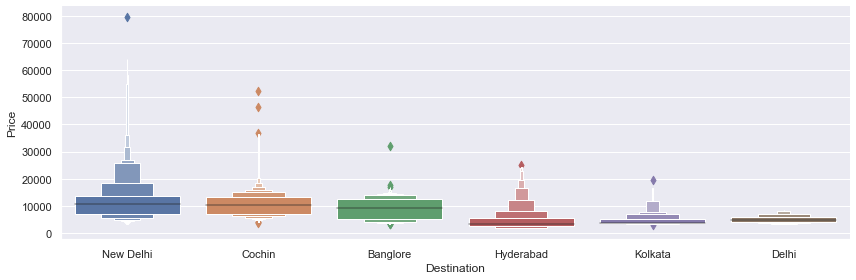

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [38]:
# Destination vs Price
sns.catplot(y = "Price", x = "Destination", data = train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

In [39]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data = pd.concat([train, Airline, Source, Destination], axis = 1)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_Day,Dep_hour,Dep_miniute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50,0,13,24,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25,2,25,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0,3,32,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25,2,34,3,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45,0,34,8,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data.head()

,Total_Stops,Price,Journey_Month,Journey_Day,Dep_hour,Dep_miniute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,0,13,24,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,2,25,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,3,32,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,2,34,3,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,0,34,8,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


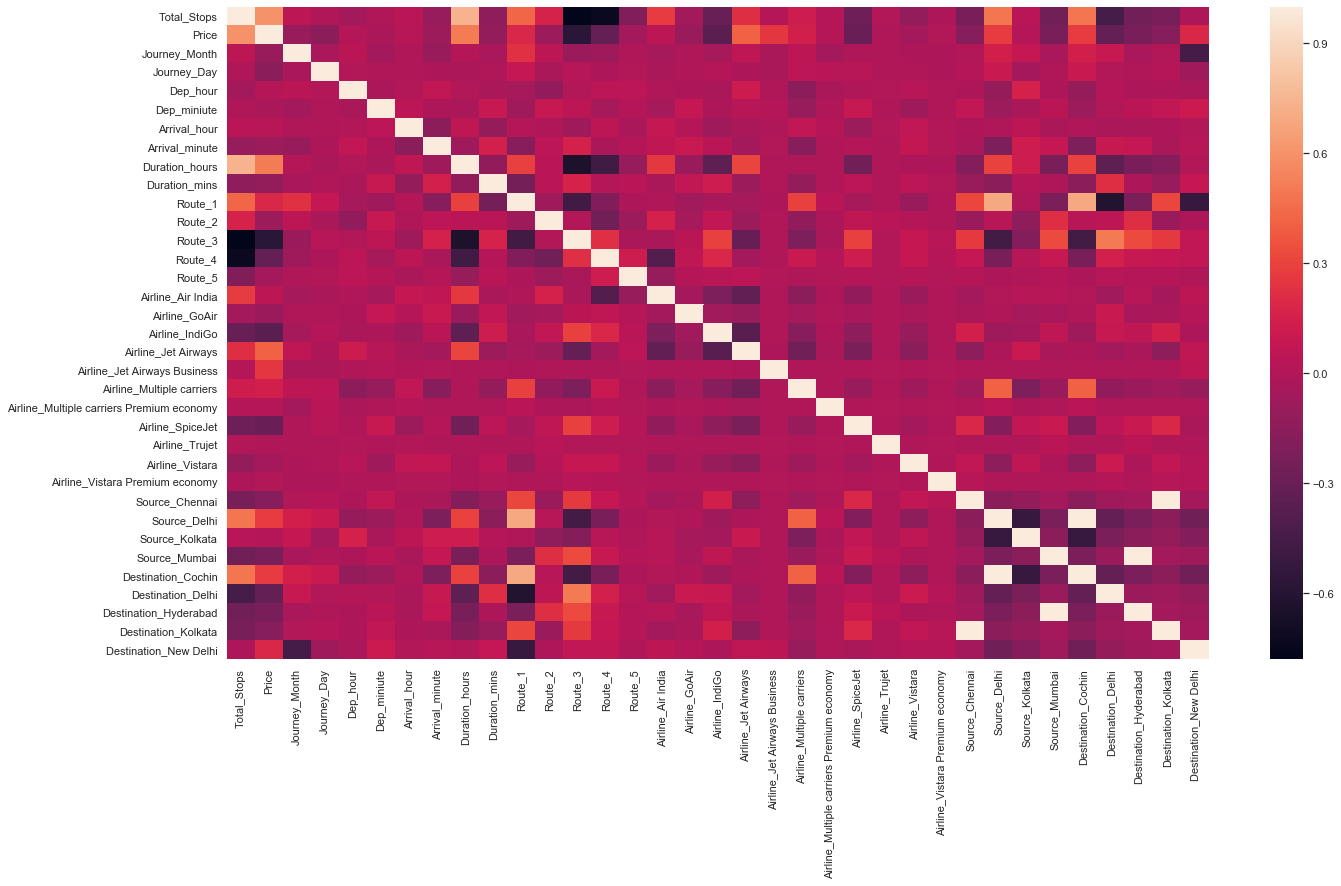

In [41]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (22,12))
sns.heatmap(data.corr())

plt.show()

# EDA 
Exploratory Data analysis for Test Dataset

In [42]:
#all the data types and their unique values
for column in test.columns:
    if test[column].dtype == object:
        print(str(column) + ': ' +str())
        print(test[column].value_counts())
        print('\n')

Airline: 
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64


Date_of_Journey: 
9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/03/2019     65
27/05/2019     65
1/05/2019      62
3/03/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019     34
15/03

In [43]:
test["Journey_Month"] = pd.to_datetime(test["Date_of_Journey"], format = "%d/%m/%Y").dt.month

test["Journey_Day"] = pd.to_datetime(test["Date_of_Journey"], format="%d/%m/%Y").dt.day
# since there is only 2019 data ,so that i am not taking it


# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

test.drop(["Date_of_Journey"], axis = 1, inplace = True)


# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour

# Extracting Minutes
test["Dep_miniute"] = pd.to_datetime(test["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
test.drop(["Dep_Time"], axis = 1, inplace = True)


# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train["Arrival_hour"] = pd.to_datetime(test.Arrival_Time).dt.hour

# Extracting Minutes
test["Arrival_minute"] = pd.to_datetime(test.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
test.drop(["Arrival_Time"], axis = 1, inplace = True)


# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
# Adding duration_hours and duration_mins list to train_data dataframe

test["Duration_hours"] = duration_hours
test["Duration_mins"] = duration_mins
test.drop(["Duration"], axis = 1, inplace = True)


test['Route_1'] = test["Route"].str.split('→ ').str[0]
test['Route_2'] = test["Route"].str.split('→ ').str[1]
test['Route_3'] = test["Route"].str.split('→ ').str[2]
test['Route_4'] = test["Route"].str.split('→ ').str[3]
test['Route_5'] = test["Route"].str.split('→ ').str[4]

test['Route_1'].fillna("None",inplace = True)
test['Route_2'].fillna("None",inplace = True)
test['Route_3'].fillna("None",inplace = True)
test['Route_4'].fillna("None",inplace = True)
test['Route_5'].fillna("None",inplace = True)

test.drop(["Route"], axis = 1, inplace = True)

#Data Handling

leb_code = LabelEncoder()
test['Route_1'] = leb_code.fit_transform(test['Route_1'])
test['Route_2'] = leb_code.fit_transform(test['Route_2'])
test['Route_3'] = leb_code.fit_transform(test['Route_3'])
test['Route_4'] = leb_code.fit_transform(test['Route_4'])
test['Route_5'] = leb_code.fit_transform(test['Route_5'])

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

test.drop(["Additional_Info"], axis = 1, inplace = True)

# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = test[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)



# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = test[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)


# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = test[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)



# Concatenate dataframe --> train_data + Airline + Source + Destination

data_test = pd.concat([train, Airline, Source, Destination], axis = 1)
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [44]:
data_test.head()

,Total_Stops,Price,Journey_Month,Journey_Day,Dep_hour,Dep_miniute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,4.0,10,2,50,0,13,24,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,7662,5,1,5,50,10.0,15,7,25,2,25,1,3,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,13882,6,9,9,25,19.0,25,19,0,3,32,4,5,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,6218,5,12,18,5,21.0,30,5,25,2,34,3,12,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,13302,3,1,16,50,2.0,35,4,45,0,34,8,12,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Feature Selection

In [45]:
data.columns

Index(['Total_Stops', 'Price', 'Journey_Month', 'Journey_Day', 'Dep_hour',
       'Dep_miniute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_mins', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [46]:
X = data.loc[:, ['Total_Stops','Journey_Month', 'Journey_Day', 'Dep_hour',
       'Dep_miniute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_mins', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_Month,Journey_Day,Dep_hour,Dep_miniute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3,24,22,20,1,10,2,50,0,13,24,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,2,25,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,19,0,3,32,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,5,25,2,34,3,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,4,45,0,34,8,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [47]:
y = data.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

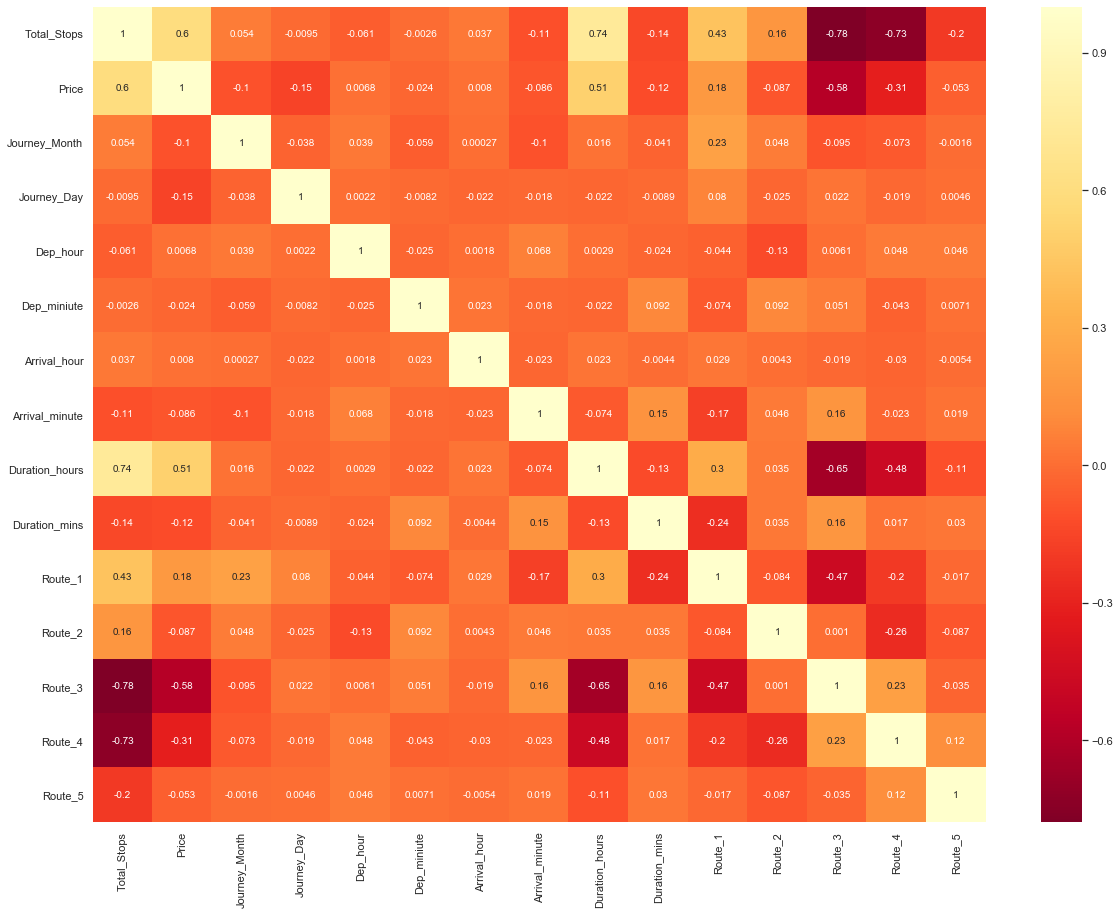

In [48]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (20,15))
sns.heatmap(train.corr(), annot = True, cmap = "YlOrRd_r")
plt.show()

In [49]:
# Important feature using ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [50]:
print(selection.feature_importances_)

[1.55336258e-01 5.31980660e-02 1.45365867e-01 2.00564583e-02
 1.79609605e-02 2.14709199e-02 1.41379400e-02 7.44140705e-02
 1.32525520e-02 1.02092210e-02 2.16700236e-02 1.82742012e-01
 1.76131764e-02 4.43108479e-04 7.39736925e-03 1.24794390e-03
 1.56900087e-02 9.93528310e-02 6.55830023e-02 2.29873458e-02
 8.57253400e-04 2.08401933e-03 9.57101308e-05 5.14785641e-03
 8.46101497e-05 4.35371543e-04 1.92699546e-03 1.84269230e-03
 2.91547855e-03 3.33881923e-03 1.19164423e-03 3.42972789e-03
 2.90143262e-04 1.62305435e-02]


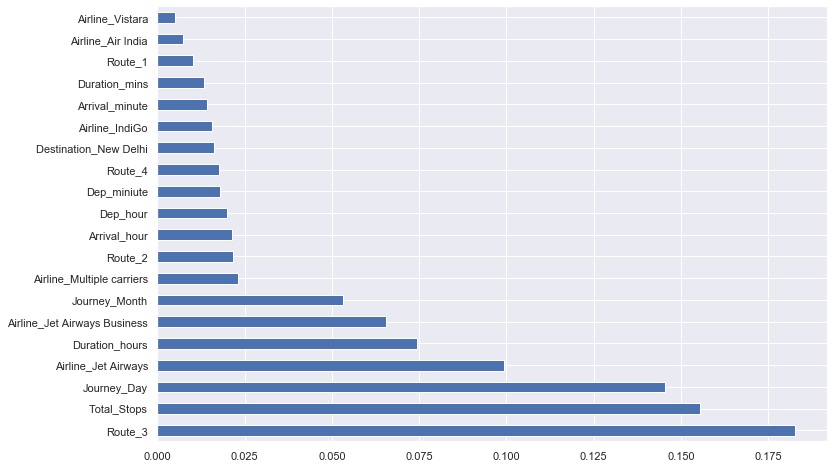

In [51]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [52]:
# Splitting the data into X and y using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 43)

# Model Building

In [53]:
#Using Linear Regression
lr = LinearRegression()

In [54]:
#Build our Cross Validation method
kfolds = KFold(n_splits=50, shuffle=True, random_state=43)

In [55]:
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring="neg_mean_squared_error",cv=kfolds))
    return(rmse)

In [56]:
benchmark_model = make_pipeline(RobustScaler(),lr.fit(X=X_train,y=y_train))
cv_rmse(benchmark_model).mean()

2788.990915209502

In [57]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [58]:
y_dt_pred = dt.predict(X_test)

In [59]:
dt.score(X_train, y_train)

0.9723872921135401

In [60]:
dt.score(X_test, y_test)

0.7450376409910193

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, y_dt_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_dt_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_dt_pred)))

MAE: 1340.1580603224131
MSE: 5624318.769663287
RMSE: 2371.56462481276


In [62]:
metrics.r2_score(y_test, y_dt_pred)

0.7450376409910193

In [63]:
# Support Vector Machine
svm = SVR(gamma='scale')
svm.fit(X_train,y_train)

SVR()

In [64]:
y_svm_pred = svm.predict(X_test)

In [65]:
svm.score(X_train, y_train)

0.024238105149015587

In [66]:
svm.score(X_test, y_test)

0.024136657631237735

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, y_svm_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_svm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_svm_pred)))

MAE: 3490.0030186858226
MSE: 21526967.8804535
RMSE: 4639.716357758683


In [68]:
metrics.r2_score(y_test, y_svm_pred)

0.024136657631237735

In [69]:
# KNeighbors Regressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [70]:
y_knn_pred = knn.predict(X_test)

In [71]:
knn.score(X_train, y_train)

0.7439383316372612

In [72]:
knn.score(X_test, y_test)

0.6263783204588322

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, y_knn_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_knn_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_knn_pred)))

MAE: 1748.9151326053043
MSE: 8241873.1657659905
RMSE: 2870.8662744485314


In [74]:
metrics.r2_score(y_test, y_knn_pred)

0.6263783204588322

In [75]:
# Using Random Forest Regressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
y_rf_pred = reg_rf.predict(X_test)

In [77]:
reg_rf.score(X_train, y_train)

0.9528849642687426

In [78]:
reg_rf.score(X_test, y_test)

0.83287157867134

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, y_rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_rf_pred)))

MAE: 1165.3123786824115
MSE: 3686754.0788241103
RMSE: 1920.0922058130725


In [80]:
metrics.r2_score(y_test, y_rf_pred)

0.83287157867134

# Hyperparameter Tuning

In [81]:
#Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [82]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [83]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [84]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [85]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [86]:
final_rf = RandomForestRegressor(n_estimators= 700,
                                 min_samples_split= 15,
                                 min_samples_leaf= 1,
                                 max_features= 'auto',
                                 max_depth= 20)

In [87]:
final_rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [88]:
final_rf.score(X_test,y_test)

0.8453595500713726

# Model Saving

In [89]:
import joblib
joblib.dump(final_rf,"FinalModel.pkl")